In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

import datetime
from pandas.tseries.offsets import DateOffset
from pandas.tseries.offsets import MonthEnd

import statsmodels.api as sm
from scipy import stats
import itertools

import gc
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "Dataset.csv"
df = pd.read_csv(path)

# Exploratory data analysis

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Date Conversion
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s", origin="unix")

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


Text(0.07, 1, 'Missing data check')

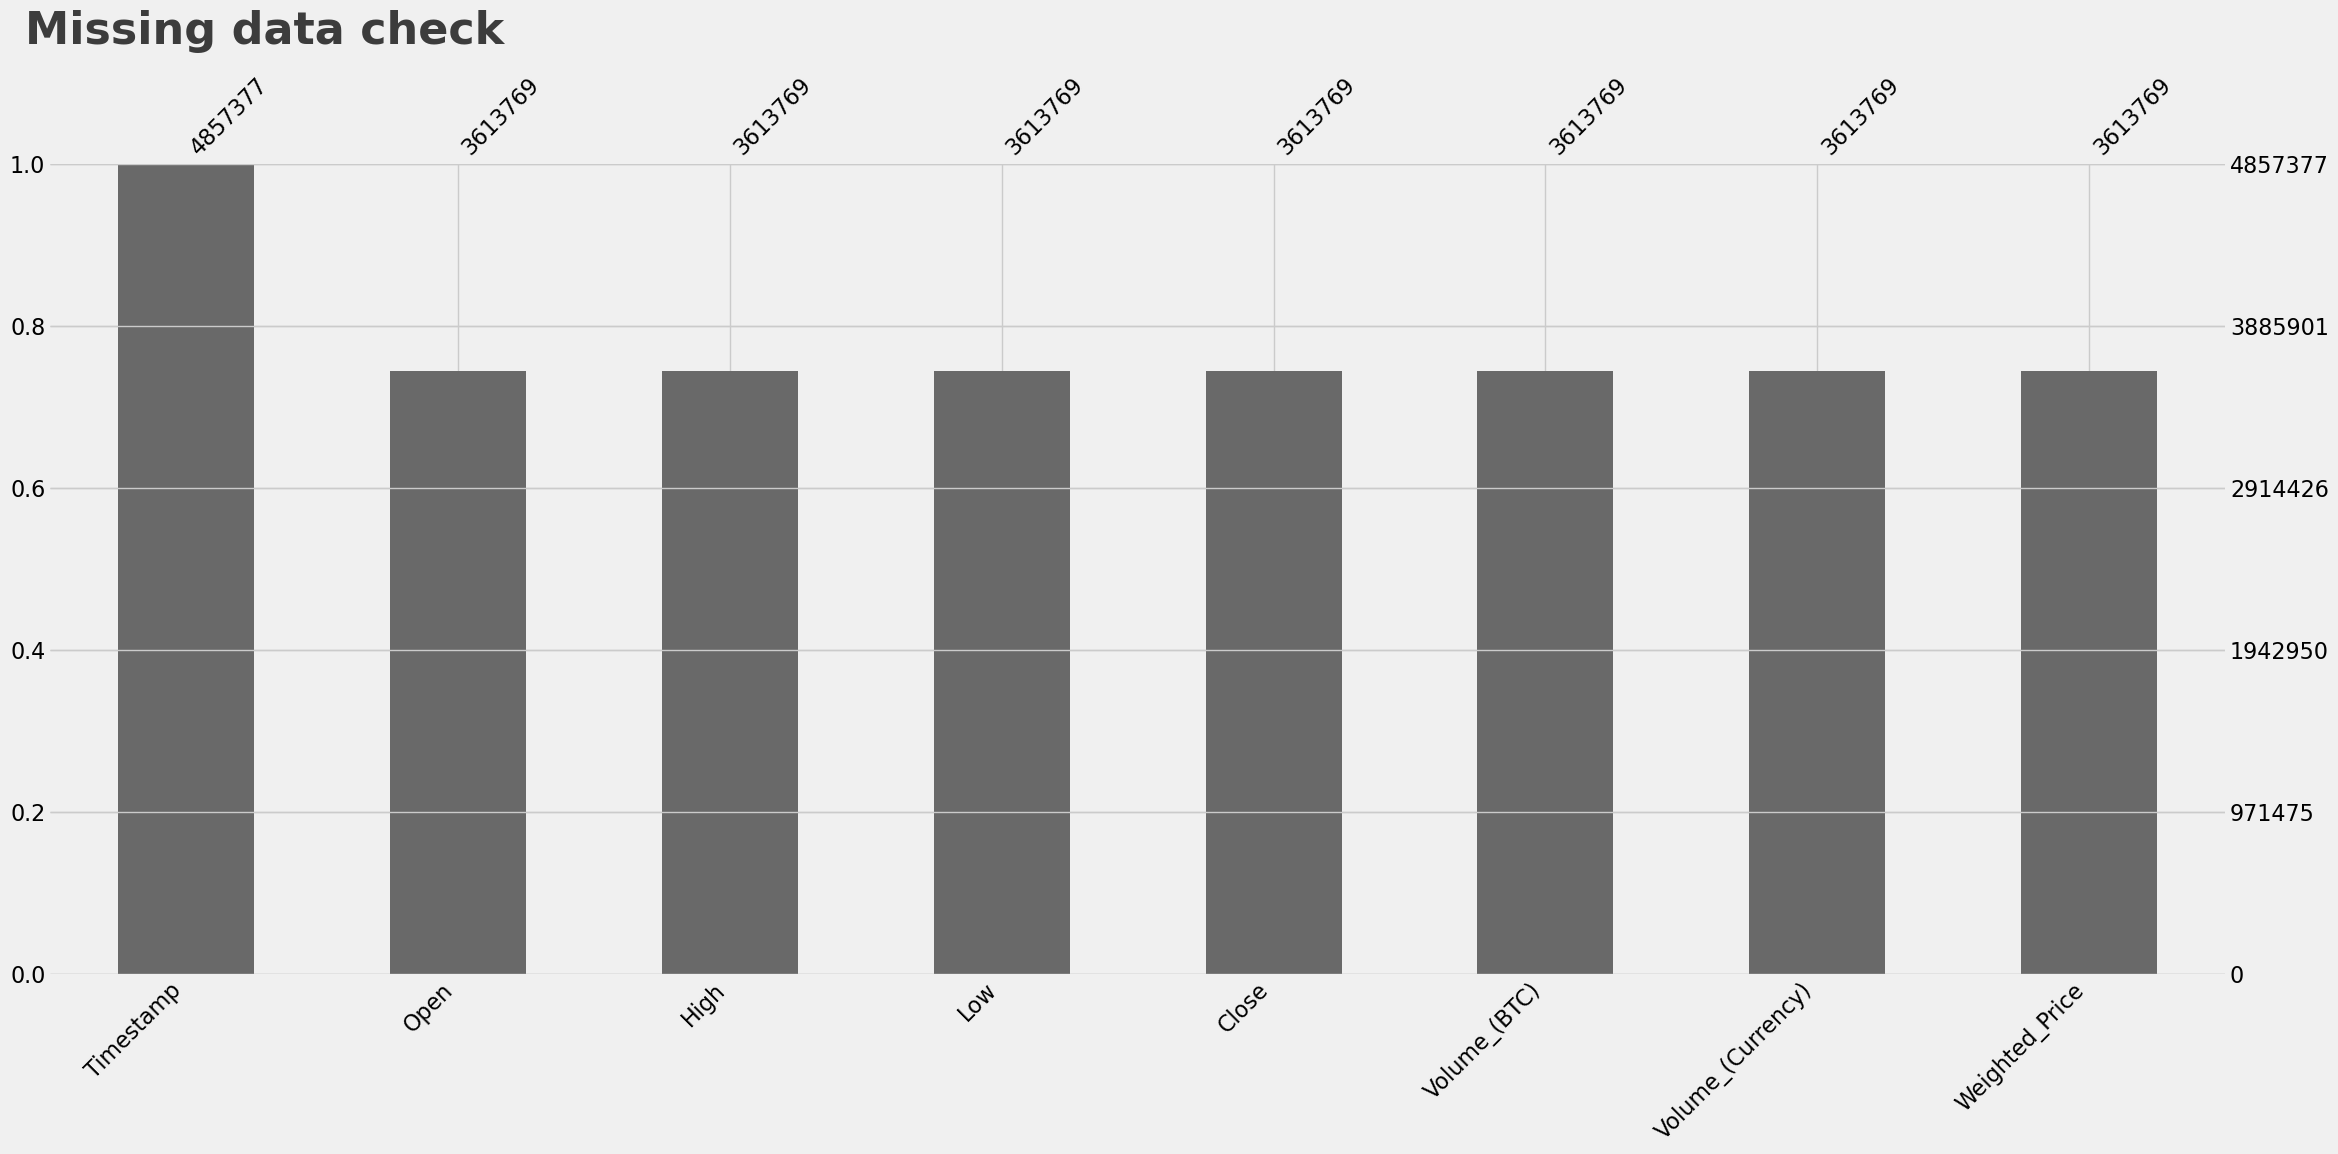

In [6]:
# Visualizing the missing data

ax, fig = plt.subplots(figsize=(10,5))

msno.bar(df)

ax.text(0.07,1, s="Missing data check", fontsize=32, weight="bold", alpha=0.75)

In [7]:
df.set_index(df["Timestamp"],drop=True,inplace=True)
# we are going to resample the data to an hourly format and analyse it further as such.
df_hour = df.resample("h").mean()

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


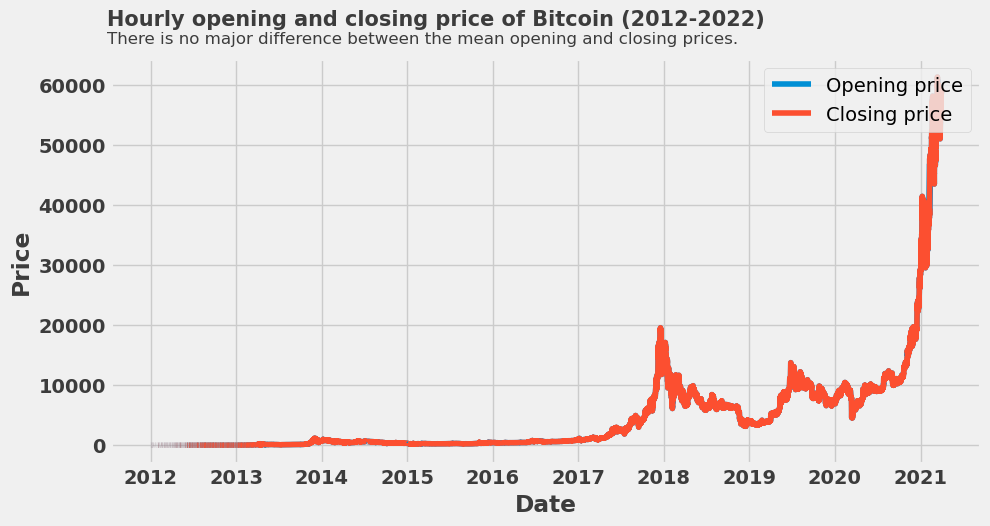

In [8]:
# Visualizing and comparing the hourly opening and closing prices.

ax, fig = plt.subplots(figsize = (10,5))

plt.plot(df_hour["Open"], label="Opening price")
plt.plot(df_hour["Close"], label="Closing price")

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")

plt.legend()

plt.text(x=datetime.date(2011, 6, 30), y=70000, s="Hourly opening and closing price of Bitcoin (2012-2022)",
fontsize=15, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=67000, s="There is no major difference between the mean opening and closing prices.",fontsize=12, alpha=0.75)

plt.legend(loc='upper right')

plt.show()

To further highlight the differences between the opening and closing reads, we are going to create a column that represents the differences between these prices on the hourly dataset. The modification will allow the data to be clearly visually presented.

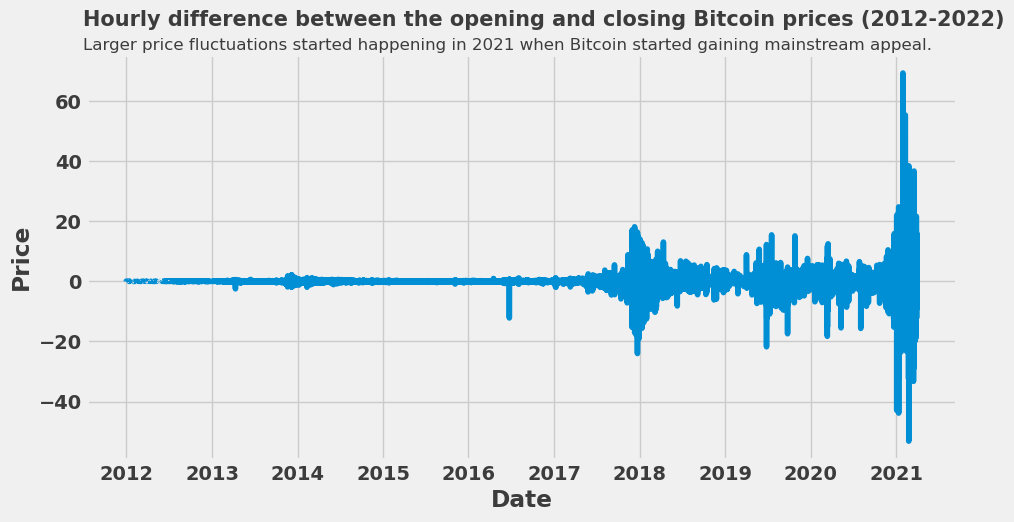

In [9]:
# Visualizing the difference between the hourly opening and closing prices.

df_hour["hourly_diff"] = df_hour["Close"] - df_hour["Open"]

#Plot
ax, fig = plt.subplots(figsize = (10,5))

plt.plot(df_hour["hourly_diff"])

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")


plt.text(x=datetime.date(2011, 6, 30), y=85, s="Hourly difference between the opening and closing Bitcoin prices (2012-2022)",
         fontsize=15, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=77, s="Larger price fluctuations started happening in 2021 when Bitcoin started gaining mainstream appeal.",
         fontsize=12, alpha=0.75)

plt.show()

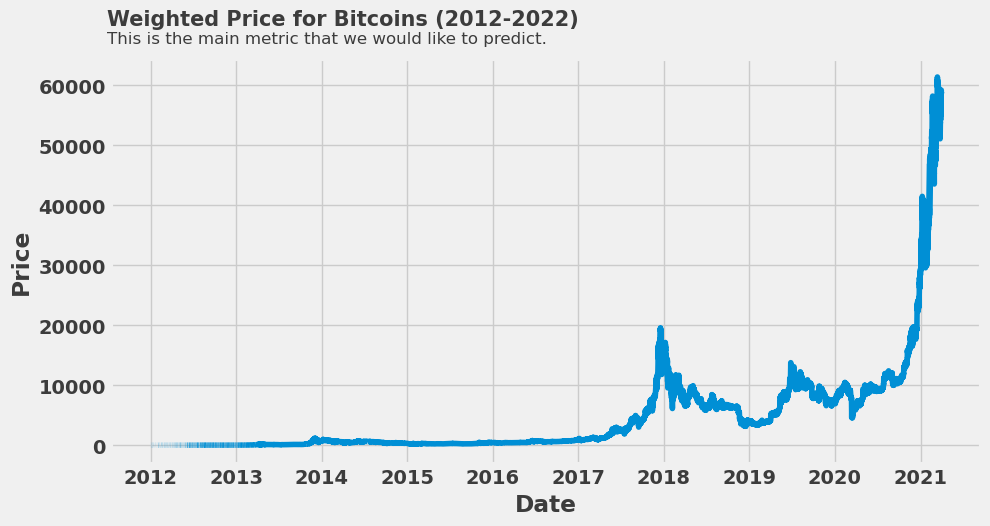

In [10]:
# Visualizing the Weighted Price

ax, fig = plt.subplots(figsize = (10,5))

plt.plot(df_hour["Weighted_Price"])

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")

plt.text(x=datetime.date(2011, 6, 30), y=70000, s="Weighted Price for Bitcoins (2012-2022)",
         fontsize=15, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=67000, s="This is the main metric that we would like to predict.", 
         fontsize=12, alpha=0.75)

plt.show()

The metric that makes the most sense to predict would be the weighted prices of bitcoins. Again, I am going to use the hourly resampled dataset from now on and the prediction will be done using that dataset.


Most time-series data is composed of three elements:

* Season - a repeating cycle in the series
* Trend - an upwards or downwards movement in the series
* Residual or noise - random variation in the data

Some literature also adds "level" to the decomposition. A "level" can be described as the average value in the series.

Seasonal decomposition can be a great way structured approach to a time series problem. The acquired information is useful when thinking about the specific problem and planing the future approach to the model. I am going to use the automatic seasonal decomposition tool and plot the results.

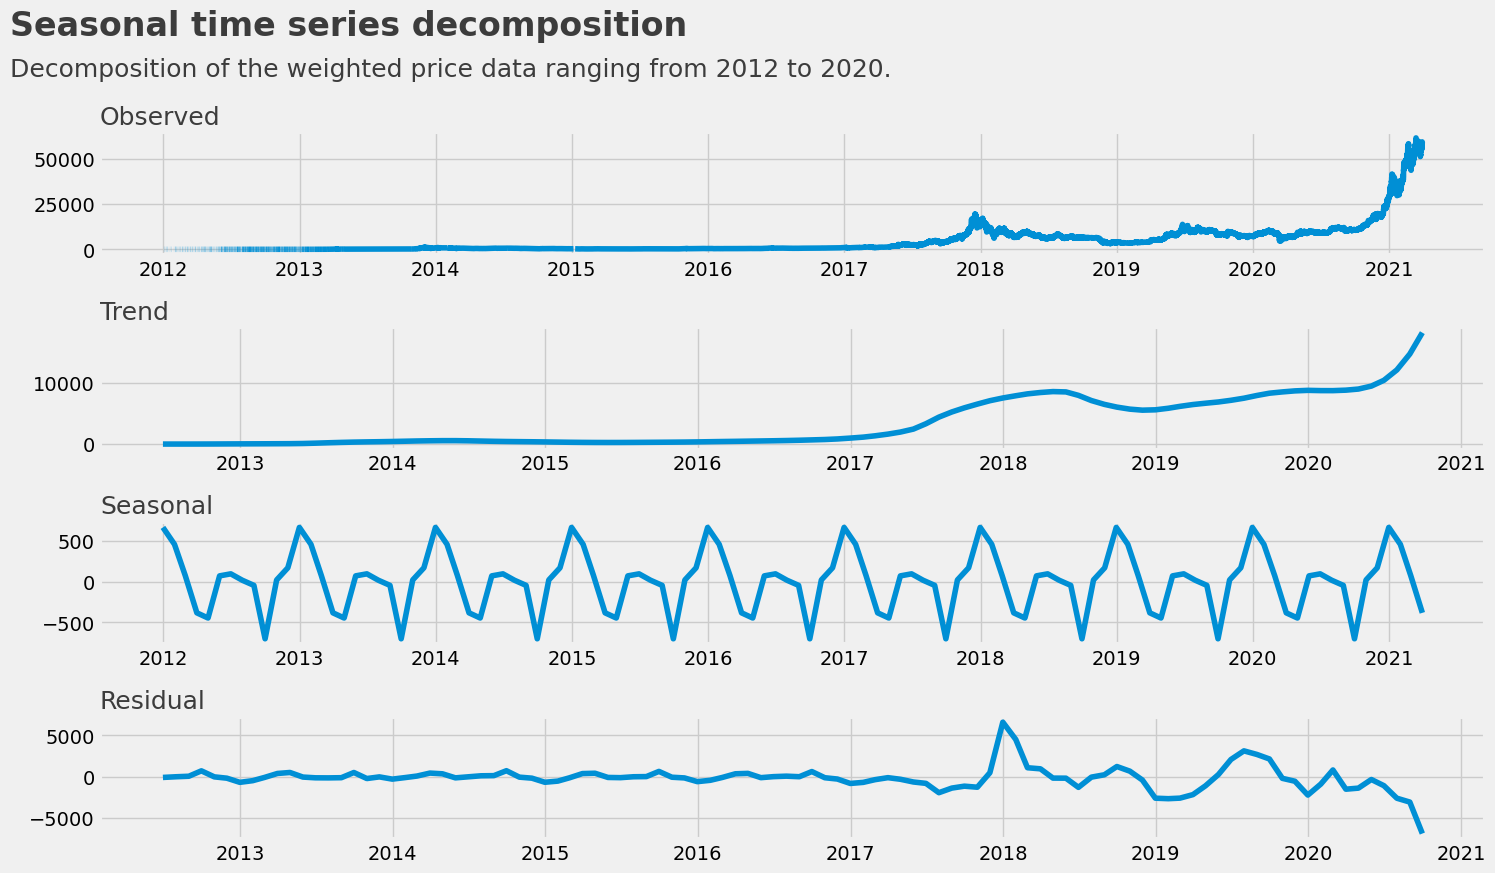

In [11]:
#Seasonal Decompose
ax, fig = plt.subplots(figsize=(15,8), sharex=True)

df_month = df.resample("M").mean()
dec = sm.tsa.seasonal_decompose(df_month["Weighted_Price"])


plt.subplot(411)
plt.plot(df_hour["Weighted_Price"], label="Weighted Price")
plt.title("Observed",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(dec.trend, label="Trend")
plt.title("Trend",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(dec.seasonal, label="Seasonal")
plt.title("Seasonal",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(dec.resid, label="Residual")
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

plt.text(x=datetime.date(2011, 6, 30), y=90000, s="Seasonal time series decomposition",
         fontsize=24, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=85000, s="Decomposition of the weighted price data ranging from 2012 to 2020.",
         fontsize=18, alpha=0.75)

plt.show()

From the plot above we can see a few things:

* Bitcoin prices are facing a strong upward trend.
* There are some seasonal elements to the price (+- 500)
* Most of the noise in the data was generated during the "hype" phase of 2018-2022.

# **Stationarity**

**What is stationarity?** Stationarity in (plain English) means that the statistical properties of a ceratin variable do not change over time.

**Why you do it?** It simplifies the whole analytics process and allows for a structured approach to the problem.

**Do I need it for SERIMAX?** Not really. Statsmodels SARIMAX has a (by default enabled option) that enforces stationarity. However, it is a great tool to analyse the data and should be used.

Its common practice to use it and most models nowadays assume that the data is stationary. To determine the stationarity of data we are going to use the Dickey-Fuller test. The DF tests a null hypothesis that a unit root is present in an autoregressive model. If the value is less then <0.05 then the data is stationary.

In [12]:
print("Dicky-Fuller stationarity test - p: %f" % sm.tsa.adfuller(df_month["Weighted_Price"])[1])

Dicky-Fuller stationarity test - p: 0.998833


**Box-Cox**

Box-Cox comes from the family of power transformations and is often used as a mean to stabilize variance in a dataset. It is indexed by lambda and in certain times can be used as a differencing technique.

In [13]:
#Box-Cox

df_month["Box-Cox"], _ = stats.boxcox(df_month["Weighted_Price"])
print("Dicky-Fuller stationarity test - p: %f" % sm.tsa.adfuller(df_month["Box-Cox"])[1])

Dicky-Fuller stationarity test - p: 0.926409


**Panads diff()**

Pandas library provides an option for automatic differencing with diff().

In [14]:
# Automatic Differencing

first_diff = df_month["Weighted_Price"].diff()
print("Dicky-Fuller stationarity test - p: %f" % sm.tsa.adfuller(first_diff[1:])[1])
print("This series is stationary")


df_month["Auto_Diff"] = first_diff

Dicky-Fuller stationarity test - p: 0.013427
This series is stationary




Now lets plot the seasonal decomposition and AC & PAC on the stationary data so we can see the results.

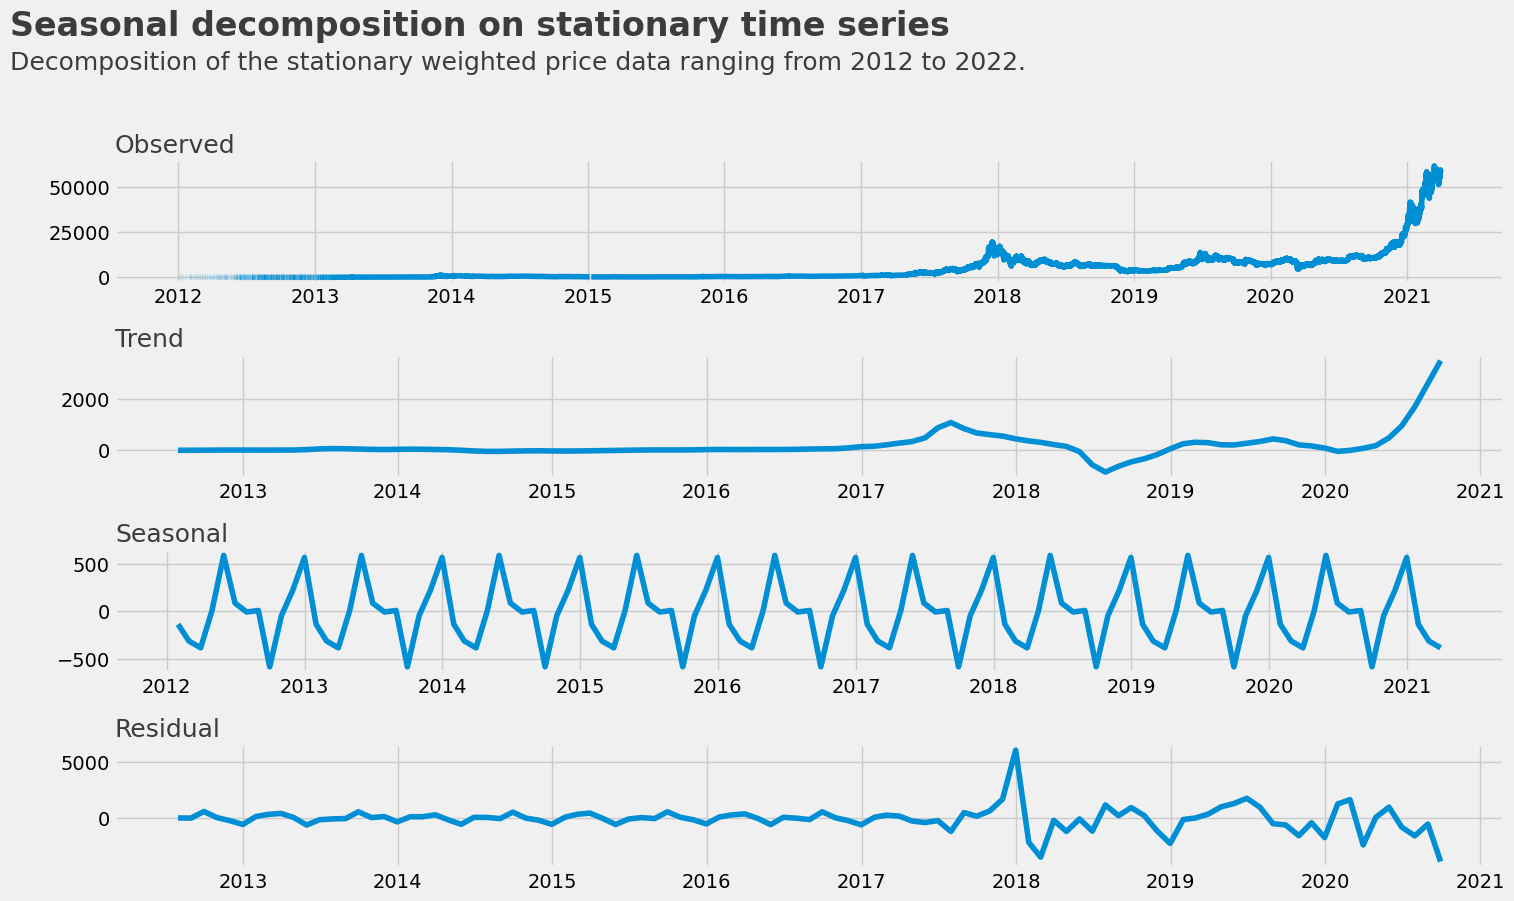

In [15]:
#Data
seasonal_dec = sm.tsa.seasonal_decompose(df_month["Auto_Diff"][1:])

#Seasonal Decompose on stationary series
ax, fig = plt.subplots(figsize=(15,8), sharex=True)

df_month = df.resample("M").mean()
dec = sm.tsa.seasonal_decompose(df_month["Weighted_Price"])


plt.subplot(411)
plt.plot(df_hour["Weighted_Price"], label="Weighted Price")
plt.title("Observed",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(seasonal_dec.trend, label="Trend")
plt.title("Trend",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal_dec.seasonal, label="Seasonal")
plt.title("Seasonal",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(seasonal_dec.resid, label="Residual")
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

plt.text(x=datetime.date(2011, 6, 30), y=70000, s="Seasonal decomposition on stationary time series",
         fontsize=24, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=67000, s="Decomposition of the stationary weighted price data ranging from 2012 to 2022.",
         fontsize=18, alpha=0.75)


plt.show()

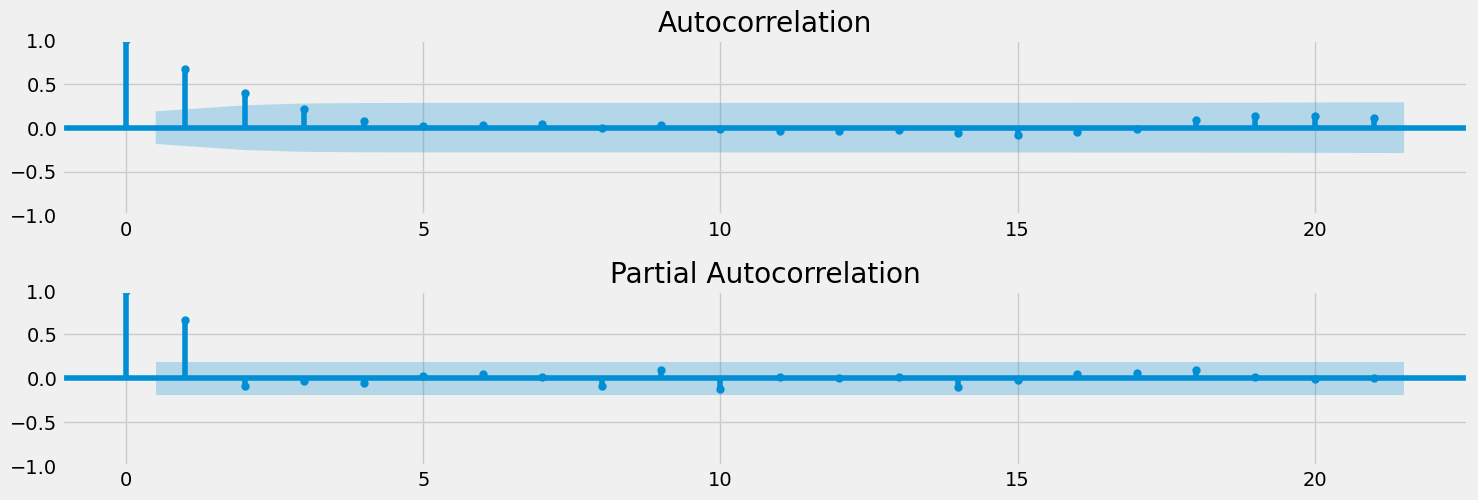

In [16]:
ax, fig = plt.subplots(figsize=(15,10))

plt.subplot(411)
x = sm.graphics.tsa.plot_acf(first_diff[1:], ax=plt.gca())
plt.subplot(412)
y = sm.graphics.tsa.plot_pacf(first_diff[1:],ax=plt.gca())
plt.tight_layout()

plt.show()
gc.collect()
del x,y

# SARIMAX

SARIMAX is short for the Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model. It is a widely used forecasting method for univariate time-series forecasting SARIMAX can handle both trends and seasonality in data. This makes it an excellent choice in forecasting data that has both of these elements.

In [17]:
###SARIMAX###

#Constructs all possible parameter combinations.
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [18]:
def sarimax_function(data,pdq,s_pdq):

    """
    The function uses a brute force approach to apply all possible pdq combinations and evaluate the model
    """

    result_list = []
    for param in pdq:
        for s_param in s_pdq:

            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=s_param,
            enforce_invertibility=False,enforce_stationarity=False)

            results = model.fit()
            result_list.append([param,s_param,results.aic])
            print("ARIMA Parameters: {} x: {}. AIC: {}".format(param,s_param,results.aic))

    return result_list,results

The evaluation metric for the model selection was AIC (Akaike Information Criterion -> AIC=ln (sm2) + 2m/T). As a model selection tool, AIC has some limitations as it only provides a relative evaluation of the model. However, it is an excellent metric for checking the general quality of a model such as SARIMAX.

Let's start training

In [19]:
result_list,results = sarimax_function(df_month["Weighted_Price"],pdq,seasonal_pdq)

gc.collect()

ARIMA Parameters: (0, 0, 0) x: (0, 0, 0, 12). AIC: 2347.7152083947876
ARIMA Parameters: (0, 0, 0) x: (0, 0, 1, 12). AIC: 2147.3147625765764
ARIMA Parameters: (0, 0, 0) x: (0, 1, 0, 12). AIC: 2052.432370351397
ARIMA Parameters: (0, 0, 0) x: (0, 1, 1, 12). AIC: 1817.4254682030187
ARIMA Parameters: (0, 0, 0) x: (1, 0, 0, 12). AIC: 2065.0481838024857
ARIMA Parameters: (0, 0, 0) x: (1, 0, 1, 12). AIC: 2025.0304959289203
ARIMA Parameters: (0, 0, 0) x: (1, 1, 0, 12). AIC: 1836.6348965253674
ARIMA Parameters: (0, 0, 0) x: (1, 1, 1, 12). AIC: 1813.2951689687252
ARIMA Parameters: (0, 0, 1) x: (0, 0, 0, 12). AIC: 2247.0287650139367
ARIMA Parameters: (0, 0, 1) x: (0, 0, 1, 12). AIC: 2071.050918024774
ARIMA Parameters: (0, 0, 1) x: (0, 1, 0, 12). AIC: 1966.1510805307855
ARIMA Parameters: (0, 0, 1) x: (0, 1, 1, 12). AIC: 1731.9220393142382
ARIMA Parameters: (0, 0, 1) x: (1, 0, 0, 12). AIC: 2035.1262346110998
ARIMA Parameters: (0, 0, 1) x: (1, 0, 1, 12). AIC: 1992.7495496328058
ARIMA Parameters: (0, 

34

In [20]:
#Dataframe of all results and parameters.

results_dataframe = pd.DataFrame(result_list, columns=["dpq","s_dpq","aic"]).sort_values(by="aic")
results_dataframe.head()

,dpq,s_dpq,aic
59,"(1, 1, 1)","(0, 1, 1, 12)",1527.790516
63,"(1, 1, 1)","(1, 1, 1, 12)",1529.501907
51,"(1, 1, 0)","(0, 1, 1, 12)",1541.193791
27,"(0, 1, 1)","(0, 1, 1, 12)",1541.966883
31,"(0, 1, 1)","(1, 1, 1, 12)",1543.838988


In [21]:
model = sm.tsa.statespace.SARIMAX(df_month["Weighted_Price"], order=(0, 1, 1), seasonal_order=(1, 1, 1, 12),
            enforce_invertibility=False,enforce_stationarity=False).fit()
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6595      0.066     10.022      0.000       0.530       0.788
ar.S.L12      -0.0639      0.147     -0.436      0.663      -0.351       0.223
ma.S.L12      -1.2001      0.054    -22.334      0.000      -1.305      -1.095
sigma2      2.921e+06   1.94e-08    1.5e+14      0.000    2.92e+06    2.92e+06


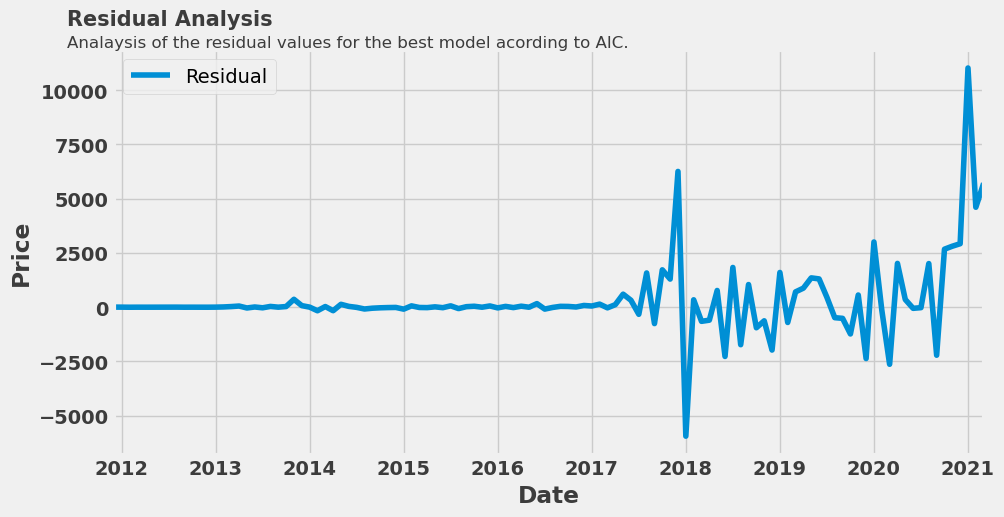

7069

In [22]:
#Residual analysis
ax, fig = plt.subplots(figsize = (10,5))

model.resid.plot(label="Residual")

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")

plt.legend()

plt.text(x=datetime.date(2011, 6, 30), y=13000, s="Residual Analysis",
fontsize=15, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=12000, s="Analaysis of the residual values for the best model acording to AIC.",fontsize=12, alpha=0.75)

plt.show()
gc.collect()

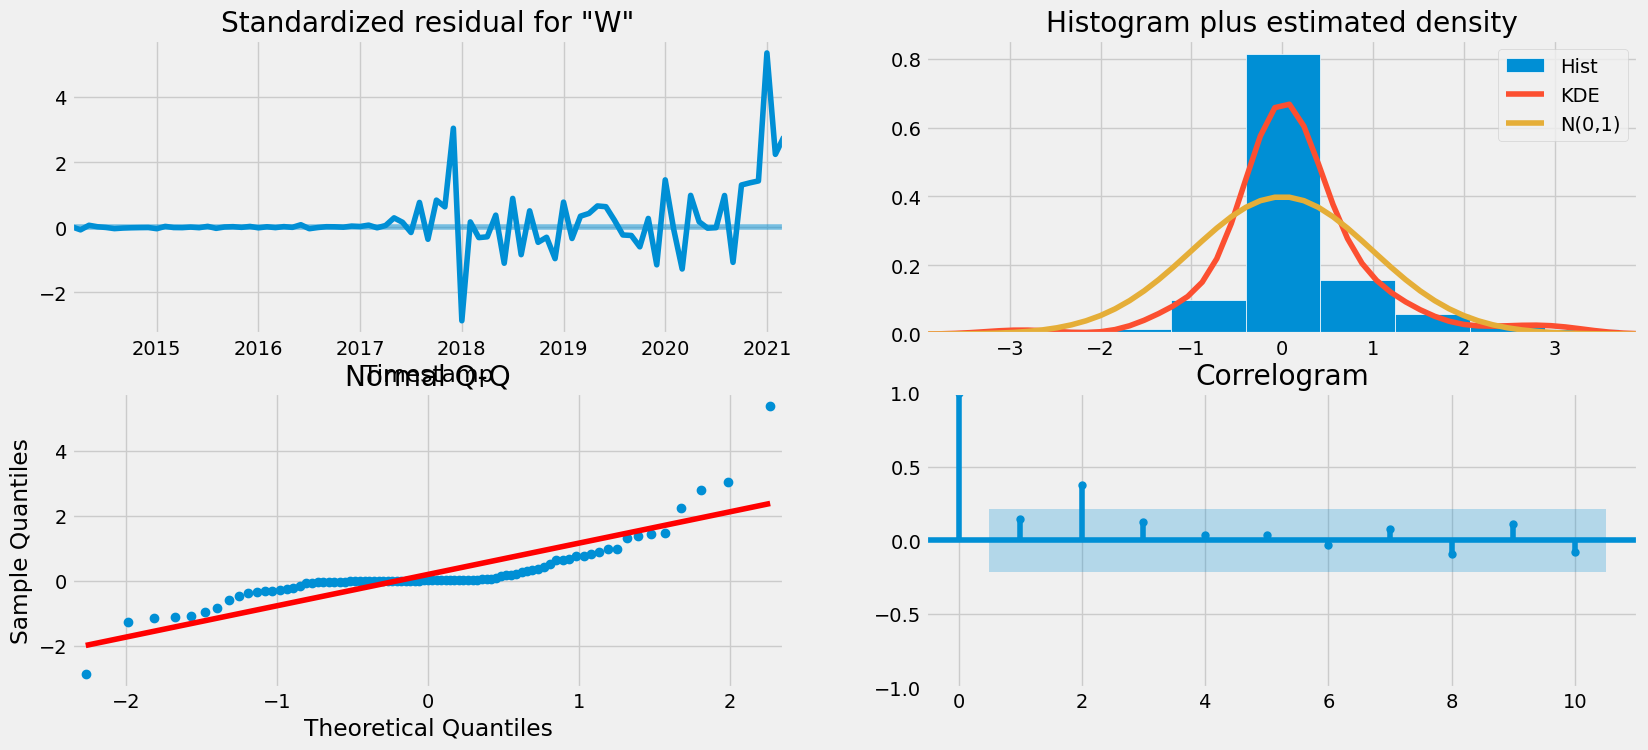

In [23]:
x = model.plot_diagnostics(figsize=(18, 8))

gc.collect()
del x

In [24]:
df_month_prediction = df_month[["Weighted_Price"]]

df_month_prediction["Forcasting"] = model.predict(start=pd.to_datetime("2011-12-31"), end=pd.to_datetime("2021-03-31"))

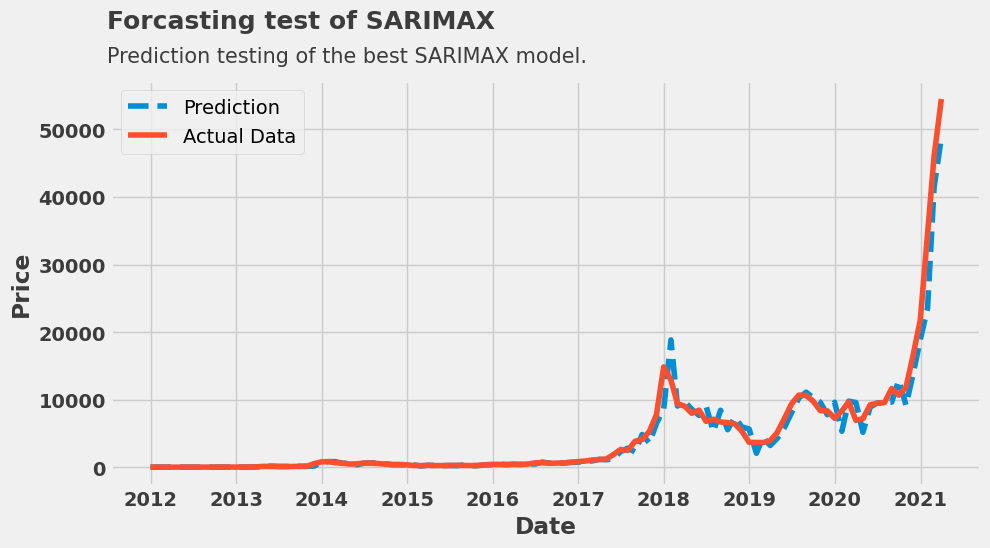

19034

In [25]:
ax, fig = plt.subplots(figsize = (10,5))

plt.plot(df_month_prediction["Forcasting"], ls="--", label="Prediction")
plt.plot(df_month_prediction["Weighted_Price"], label="Actual Data")

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")

plt.legend()

plt.text(x=datetime.date(2011, 6, 30), y=65000, s="Forcasting test of SARIMAX",
fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=60000, s="Prediction testing of the best SARIMAX model.",
         fontsize=15, alpha=0.75)

plt.show()
gc.collect()

In [41]:
#Datetimeindex dates I want to predict

future_dates = [df_month_prediction.index[-1] + DateOffset(months = x)for x in range(1,50)]
future_dates = pd.to_datetime(future_dates)  +  MonthEnd(0)
future = pd.DataFrame(index=future_dates)
df_month_prediction = pd.concat([df_month_prediction,future])

gc.collect()

0

In [46]:
#Prediction

df_month_prediction["Future_forcast"] = model.predict(start=pd.to_datetime("2021-03-31"),end=pd.to_datetime("2027-03-31"))

pred = model.get_prediction(start=pd.to_datetime("2021-03-31"),end=pd.to_datetime("2025-03-31"))
pred_ci = pred.conf_int()

gc.collect()

52

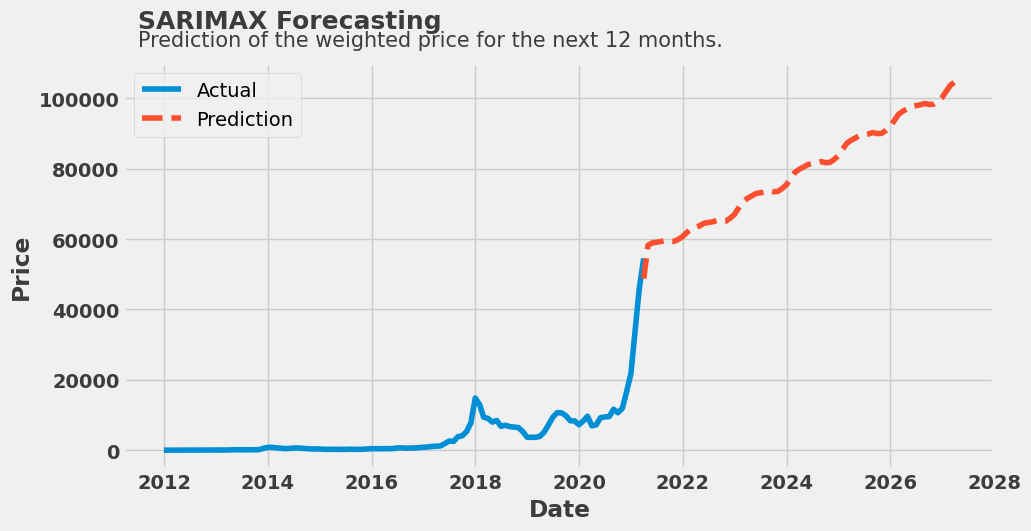

3566

In [60]:
ax, fig = plt.subplots(figsize=(10, 5))

plt.plot(df_month_prediction["Weighted_Price"], label="Actual")
plt.plot(df_month_prediction["Future_forcast"], ls="--", label="Prediction")

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date", alpha=0.75, weight="bold")
plt.ylabel("Price", alpha=0.75, weight="bold")

plt.text(x=datetime.date(2011, 6, 30), y=120000, s="SARIMAX Forecasting",
         fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=115000, s="Prediction of the weighted price for the next 12 months.",
         fontsize=15, alpha=0.75)

plt.legend()
plt.show()
gc.collect()

# Conclusion

SARIMAX is a great and interesting method to predict univariate time-series data. It was a great way to refresh our knowledge on time-series data and strengthen the number of prediction models we know (because there is no free lunch in ML). We had fun making it and I hope you had fun reading it.